In [1]:
import pandas as pd

In [2]:
pred_df = pd.read_csv('validation_preds.csv')

In [4]:
pred_df

,session_type,labels
0,11098528_clicks,11830 588923 1732105 571762 884502 1157882 876...
1,11098529_clicks,1105029 459126 1339838 1544564 217742 1694360 ...
2,11098530_clicks,409236 264500 1603001 963957 254154 583026 167...
3,11098531_clicks,396199 1271998 452188 1728212 1365569 624163 1...
4,11098532_clicks,876469 7651 108125 612920 1673641 1202618 1159...
...,...,...
5403748,12899774_carts,33035 1539309 819288 95488 270852 771913 74397...
5403749,12899775_carts,1743151 1760714 1163166 1255910 1498443 832192...
5403750,12899776_carts,548599 1401030 1150130 1440959 1144446 1330306...
5403751,12899777_carts,384045 1308634 395762 1688215 1486067 703474 2...


In [38]:
# COMPUTE METRIC
score = 0
weights = {'clicks': 0.10, 'carts': 0.30, 'orders': 0.60}
for t in ['clicks','carts','orders']:
    sub = pred_df.loc[pred_df.session_type.str.contains(t)].copy()
    sub['session'] = sub.session_type.apply(lambda x: int(x.split('_')[0]))
    sub.labels = sub.labels.apply(lambda x: [int(i) for i in x.split(' ')[:20]])
    test_labels = pd.read_parquet('../input/otto-validation/test_labels.parquet')
    test_labels = test_labels.loc[test_labels['type']==t]
    test_labels = test_labels.merge(sub, how='left', on=['session'])
    test_labels['hits'] = test_labels.apply(lambda df: len(set(df.ground_truth).intersection(set(df.labels))), axis=1)
    test_labels['gt_count'] = test_labels.ground_truth.str.len().clip(0,20)
    recall = test_labels['hits'].sum() / test_labels['gt_count'].sum()
    score += weights[t]*recall
    print(f'{t} recall =',recall)
    
print('=============')
print('Overall Recall =',score)
print('=============')

KeyboardInterrupt: 

In [4]:
# t ='clicks'
# t = 'carts'
t = 'orders'
sub = pred_df.loc[pred_df.session_type.str.contains(t)].copy()
sub['session'] = sub.session_type.apply(lambda x: int(x.split('_')[0]))
sub.labels = sub.labels.apply(lambda x: [int(i) for i in x.split(' ')])
test_labels = pd.read_parquet('../input/otto-validation/test_labels.parquet')
test_labels = test_labels.loc[test_labels['type']==t]
test_labels = test_labels.merge(sub, how='left', on=['session'])
test_labels['hits'] = test_labels.apply(lambda df: len(set(df.ground_truth).intersection(set(df.labels))), axis=1)
test_labels['gt_count'] = test_labels.ground_truth.str.len().clip(0,20)
recall = test_labels['hits'].sum() / test_labels['gt_count'].sum()
recall

0.6011139630448628

In [5]:
from glob import glob
parquetlist = glob('../input/otto-validation/test_parquet/*.parquet')

In [6]:
parquetlist

['../input/otto-validation/test_parquet/018.parquet',
 '../input/otto-validation/test_parquet/014.parquet',
 '../input/otto-validation/test_parquet/007.parquet',
 '../input/otto-validation/test_parquet/002.parquet',
 '../input/otto-validation/test_parquet/004.parquet',
 '../input/otto-validation/test_parquet/006.parquet',
 '../input/otto-validation/test_parquet/015.parquet',
 '../input/otto-validation/test_parquet/011.parquet',
 '../input/otto-validation/test_parquet/008.parquet',
 '../input/otto-validation/test_parquet/010.parquet',
 '../input/otto-validation/test_parquet/005.parquet',
 '../input/otto-validation/test_parquet/019.parquet',
 '../input/otto-validation/test_parquet/013.parquet',
 '../input/otto-validation/test_parquet/012.parquet',
 '../input/otto-validation/test_parquet/009.parquet',
 '../input/otto-validation/test_parquet/001.parquet',
 '../input/otto-validation/test_parquet/017.parquet',
 '../input/otto-validation/test_parquet/000.parquet',
 '../input/otto-validation/t

In [7]:
dataall = []
for xx in range(len(parquetlist)):
    data = pd.read_parquet(parquetlist[xx])
    dataall.append(data)
    
dataall = pd.concat(dataall).reset_index(drop=True)

In [8]:
dataall.session.nunique()

1801251

In [9]:
dataall

,session,aid,ts,type
0,12719662,1628069,1661685778000,clicks
1,12719663,523234,1661685778000,clicks
2,12719663,1316756,1661686529000,clicks
3,12719663,424606,1661686795000,clicks
4,12719663,1316756,1661686808000,clicks
...,...,...,...,...
7683572,11458779,500848,1661247257000,clicks
7683573,11458779,1625539,1661247327000,clicks
7683574,11458779,1759559,1661247359000,clicks
7683575,11458779,1759559,1661247390000,carts


In [10]:
len(set(test_labels.session.unique())&set(dataall.session.unique()))

1755534

In [11]:
dataall[dataall.session==11098530]

,session,aid,ts,type
6436671,11098530,264500,1661119200000,clicks
6436672,11098530,264500,1661119288000,clicks
6436673,11098530,409236,1661119369000,clicks
6436674,11098530,409236,1661119441000,clicks
6436675,11098530,409236,1661120165000,clicks
6436676,11098530,409236,1661120532000,carts


In [12]:
test_labels

,session,type,ground_truth,session_type,labels,hits,gt_count
0,11098528,clicks,[1679529],11098528_clicks,"[11830, 588923, 1732105, 571762, 884502, 11578...",0,1
1,11098529,clicks,[1105029],11098529_clicks,"[1105029, 459126, 1339838, 1544564, 217742, 16...",1,1
2,11098532,clicks,[1596491],11098532_clicks,"[876469, 7651, 108125, 612920, 1673641, 120261...",0,1
3,11098533,clicks,[1417450],11098533_clicks,"[1165015, 385390, 978918, 1074173, 765030, 833...",0,1
4,11098534,clicks,[908024],11098534_clicks,"[908024, 223062, 1342293, 1607945, 1449202, 53...",1,1
...,...,...,...,...,...,...,...
1755529,12899774,clicks,[1399483],12899774_clicks,"[33035, 1539309, 819288, 95488, 771913, 270852...",1,1
1755530,12899775,clicks,[1760714],12899775_clicks,"[1743151, 1760714, 1255910, 1163166, 832192, 2...",1,1
1755531,12899776,clicks,[1737908],12899776_clicks,"[548599, 1401030, 1440959, 1607333, 1144446, 3...",1,1
1755532,12899777,clicks,[384045],12899777_clicks,"[384045, 1308634, 1688215, 703474, 395762, 148...",1,1


In [10]:
from glob import glob
from tqdm import tqdm
trainparquetlist = glob('../input/otto-validation/train_parquet/*.parquet')

traindataall = []
for xx in tqdm(range(len(trainparquetlist))):
    data = pd.read_parquet(trainparquetlist[xx])
    traindataall.append(data)
    
traindataall = pd.concat(traindataall).reset_index(drop=True)

100%|██████████| 100/100 [00:16<00:00,  5.96it/s]


In [14]:
len(set(traindataall.session.unique())&set(dataall.session.unique()))

0

In [15]:
trainparquetlist[0]

'../input/otto-validation/train_parquet/018.parquet'

In [16]:
data = pd.read_parquet(trainparquetlist[0])
data

,session,aid,ts,type
0,1997748,594219,1659467140000,clicks
1,1997748,1277912,1659469712000,clicks
2,1997748,1748930,1659892243000,clicks
3,1997748,760396,1660123197000,clicks
4,1997748,483043,1660163714000,clicks
...,...,...,...,...
2125658,2108733,88530,1659473483000,clicks
2125659,2108733,707325,1659473522000,clicks
2125660,2108733,465251,1659473565000,clicks
2125661,2108733,108125,1659473608000,clicks


In [17]:
dataall[dataall.session==11098534]

,session,aid,ts,type
6436720,11098534,1449202,1661119202000,clicks
6436721,11098534,223062,1661119496000,clicks
6436722,11098534,1607945,1661119527000,clicks
6436723,11098534,1342293,1661119561000,clicks
6436724,11098534,223062,1661119703000,clicks
6436725,11098534,223062,1661119810000,clicks
6436726,11098534,908024,1661120868000,clicks


In [18]:
traindataall[traindataall.session==11098534].sort_values(by='ts')

,session,aid,ts,type


In [19]:
import time
from datetime import datetime
time_local = datetime.fromtimestamp(1661416717339/1000)
time_local

datetime.datetime(2022, 8, 25, 8, 38, 37, 339000)

In [20]:
from datetime import timedelta
time_elapsed = traindataall['ts'].max()-traindataall.ts.min()
str(timedelta(milliseconds=time_elapsed/1000))

'0:30:14.399000'

In [21]:
dataall

,session,aid,ts,type
0,12719662,1628069,1661685778000,clicks
1,12719663,523234,1661685778000,clicks
2,12719663,1316756,1661686529000,clicks
3,12719663,424606,1661686795000,clicks
4,12719663,1316756,1661686808000,clicks
...,...,...,...,...
7683572,11458779,500848,1661247257000,clicks
7683573,11458779,1625539,1661247327000,clicks
7683574,11458779,1759559,1661247359000,clicks
7683575,11458779,1759559,1661247390000,carts


In [22]:

from datetime import timedelta
time_elapsed = dataall['ts'].max()-dataall.ts.min()
str(timedelta(milliseconds=time_elapsed/1000))

'0:10:04.796000'

In [23]:
dataall.ts.min()

1661119200000

In [24]:
dataall

,session,aid,ts,type
0,12719662,1628069,1661685778000,clicks
1,12719663,523234,1661685778000,clicks
2,12719663,1316756,1661686529000,clicks
3,12719663,424606,1661686795000,clicks
4,12719663,1316756,1661686808000,clicks
...,...,...,...,...
7683572,11458779,500848,1661247257000,clicks
7683573,11458779,1625539,1661247327000,clicks
7683574,11458779,1759559,1661247359000,clicks
7683575,11458779,1759559,1661247390000,carts


In [25]:
test_labels

,session,type,ground_truth,session_type,labels,hits,gt_count
0,11098528,clicks,[1679529],11098528_clicks,"[11830, 588923, 1732105, 571762, 884502, 11578...",0,1
1,11098529,clicks,[1105029],11098529_clicks,"[1105029, 459126, 1339838, 1544564, 217742, 16...",1,1
2,11098532,clicks,[1596491],11098532_clicks,"[876469, 7651, 108125, 612920, 1673641, 120261...",0,1
3,11098533,clicks,[1417450],11098533_clicks,"[1165015, 385390, 978918, 1074173, 765030, 833...",0,1
4,11098534,clicks,[908024],11098534_clicks,"[908024, 223062, 1342293, 1607945, 1449202, 53...",1,1
...,...,...,...,...,...,...,...
1755529,12899774,clicks,[1399483],12899774_clicks,"[33035, 1539309, 819288, 95488, 771913, 270852...",1,1
1755530,12899775,clicks,[1760714],12899775_clicks,"[1743151, 1760714, 1255910, 1163166, 832192, 2...",1,1
1755531,12899776,clicks,[1737908],12899776_clicks,"[548599, 1401030, 1440959, 1607333, 1144446, 3...",1,1
1755532,12899777,clicks,[384045],12899777_clicks,"[384045, 1308634, 1688215, 703474, 395762, 148...",1,1


In [26]:
# sub = pred_df.loc[pred_df.session_type.str.contains(t)].copy()
# sub['session'] = sub.session_type.apply(lambda x: int(x.split('_')[0]))
# sub.labels = sub.labels.apply(lambda x: [int(i) for i in x.split(' ')])
# test_labels = pd.read_parquet('../input/otto-validation/test_labels.parquet')
# test_labels = test_labels.loc[test_labels['type']==t]
# test_labels10 = sub.merge(test_labels, how='left', on=['session'])

In [27]:
# test_labels10.type = t
# test_labels10['ground_truth'] = [xx if str(xx)!='nan' else [] for xx in test_labels10['ground_truth']]

In [28]:
# test_labels10.head()

In [29]:
test_labels10 = test_labels
tmp1 = pd.DataFrame([[i, x, ii] for i, y in zip(test_labels10.session,test_labels10.labels)
                    for (ii, x) in enumerate(y)],columns = ['session','aid','rank'])

tmp1['flag'] = 1

In [30]:
tmp21 = pd.DataFrame([[i, x] for i, y in zip(test_labels10.session,test_labels10.labels)
                    for (ii, x) in enumerate(y)],columns = ['session','aid'])
tmp22 = pd.DataFrame([[i, x] for i, y in zip(test_labels10.session,test_labels10.ground_truth)
                    for (ii, x) in enumerate(y)],columns = ['session','aid'])
tmp2 = pd.concat([tmp21,tmp22]).drop_duplicates()


In [31]:
tmp3 = tmp22.copy()

tmp3['label'] = 1

In [32]:
train = pd.merge(tmp2,tmp1,how='left',on=['session','aid'])

In [33]:
train = pd.merge(train,tmp3,how='left',on=['session','aid'])
train.label = train.label.fillna(0)
train['type'] = t

In [34]:
train

,session,aid,rank,flag,label,type
0,11098528,11830,0.0,1.0,0.0,clicks
1,11098528,588923,1.0,1.0,0.0,clicks
2,11098528,1732105,2.0,1.0,0.0,clicks
3,11098528,571762,3.0,1.0,0.0,clicks
4,11098528,884502,4.0,1.0,0.0,clicks
...,...,...,...,...,...,...
86835790,12899751,368925,NaN,NaN,1.0,clicks
86835791,12899761,926390,NaN,NaN,1.0,clicks
86835792,12899762,1662401,NaN,NaN,1.0,clicks
86835793,12899768,541977,NaN,NaN,1.0,clicks


In [35]:
train.session.nunique()

1755534

In [36]:
# from tqdm import tqdm 
# train2 = []
# for ii in tqdm(range(len(test_labels.head(10)))):
#     tmp1 = pd.DataFrame(test_labels.loc[ii,'labels']).reset_index()
#     tmp1.columns = ['rank','aid']
#     tmp1['flag'] = 1
#     tmp2 = pd.DataFrame(set(list(test_labels.loc[ii,'ground_truth'])+list(test_labels.loc[ii,'labels'])))
#     tmp2.columns = ['aid']

#     tmp3 = pd.merge(tmp2,tmp1,how='left',on='aid')
#     tmp3['session'] = test_labels.loc[ii,'session']
#     tmp3['type'] = test_labels.loc[ii,'type']


#     tmplabel =  pd.DataFrame(test_labels.loc[ii,'ground_truth'])
#     tmplabel.columns = ['aid']
#     tmplabel['label'] = 1


#     tmp3 = pd.merge(tmp3,tmplabel,how='left',on='aid')
#     tmp3 = tmp3.sort_values(by='rank')
#     train2.append(tmp3)


In [37]:
# train2 = pd.concat(train2).reset_index(drop=True)
# train2.label = train2.label.fillna(0)

In [38]:
# train2

In [ ]:
train.to_parquet(f'valid_label_{t}.pqt')


In [108]:
train

,session,aid,rank,flag,label,type
0,11098528,11830,0.0,1.0,0.0,carts
1,11098528,1732105,1.0,1.0,0.0,carts
2,11098528,588923,2.0,1.0,0.0,carts
3,11098528,884502,3.0,1.0,0.0,carts
4,11098528,1157882,4.0,1.0,0.0,carts
...,...,...,...,...,...,...
14778122,12899536,497001,NaN,NaN,1.0,carts
14778123,12899541,1266719,NaN,NaN,1.0,carts
14778124,12899595,1170894,NaN,NaN,1.0,carts
14778125,12899608,327026,NaN,NaN,1.0,carts


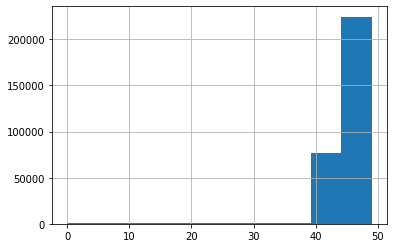

In [109]:
train.groupby('session')['rank'].max().hist()

In [110]:
train.label.mean()

0.03930247723544398

In [111]:
dataall

,session,aid,ts,type
0,12719662,1628069,1661685778000,clicks
1,12719663,523234,1661685778000,clicks
2,12719663,1316756,1661686529000,clicks
3,12719663,424606,1661686795000,clicks
4,12719663,1316756,1661686808000,clicks
...,...,...,...,...
7683572,11458779,500848,1661247257000,clicks
7683573,11458779,1625539,1661247327000,clicks
7683574,11458779,1759559,1661247359000,clicks
7683575,11458779,1759559,1661247390000,carts


In [113]:
datafeature_base = pd.concat([dataall,traindataall])

In [115]:
# dataall[dataall.type=='clicks'].groupby('session')['type'].mean()

In [34]:
type_weight_multipliers = {'clicks': 1, 'carts': 6, 'orders': 3}

## 用户特征

In [173]:
dataall0 = dataall.copy()
dataall0['type'] = dataall0['type'].apply(lambda x:type_weight_multipliers[x])
user_features0 = dataall0.groupby('session').agg({'session':'count','aid':'nunique','type':'mean'})
user_features0.columns = ['user_count','user_item_count','user_buy_ratio']

user_features1 = dataall[dataall.type=='clicks'].groupby('session').agg({'session':'count','aid':'nunique'})
user_features1.columns = ['user_clicks_count','user_clicks_item_count']

user_features2 = dataall[dataall.type=='carts'].groupby('session').agg({'session':'count','aid':'nunique'})
user_features2.columns = ['user_carts_count','user_carts_item_count']

user_features3 = dataall[dataall.type=='orders'].groupby('session').agg({'session':'count','aid':'nunique'})
user_features3.columns = ['user_orders_count','user_orders_item_count']

user_features = pd.concat([user_features0,user_features1,user_features2,user_features3],axis=1)


In [174]:
user_features.to_parquet('user_features.pqt')

## 物品特征

In [35]:
dataall0 = pd.concat([dataall,traindataall])

# dataall0 = pd.concat([dataall])

dataall0['type_number'] = dataall0['type'].apply(lambda x:type_weight_multipliers[x])
dataall0.shape

(7683577, 5)

In [36]:
item_features0 = dataall0.groupby('aid').agg({'aid':'count','session':'nunique','type_number':'mean'})
item_features0.columns = ['item_count','item_user_count','item_buy_ratio']
item_features0

,item_count,item_user_count,item_buy_ratio
aid,,,
0,5,4,1.000000
2,4,3,1.000000
3,324,184,1.429012
4,8,6,1.000000
11,4,2,2.250000
...,...,...,...
1855593,12,10,1.000000
1855594,117,70,1.717949
1855598,1,1,1.000000


In [37]:
item_features1 = dataall0[dataall0.type=='clicks'].groupby('aid').agg({'aid':'count','session':'nunique'})
item_features1.columns = ['item_clicks_count','item_clicks_user_count']

item_features2 = dataall0[dataall0.type=='carts'].groupby('aid').agg({'aid':'count','session':'nunique'})
item_features2.columns = ['item_carts_count','item_carts_user_count']

item_features3 = dataall0[dataall0.type=='orders'].groupby('aid').agg({'aid':'count','session':'nunique'})
item_features3.columns = ['item_orders_count','item_orders_user_count']


In [38]:
item_features = pd.concat([item_features0,item_features1,item_features2,item_features3],axis=1)
item_features

,item_count,item_user_count,item_buy_ratio,item_clicks_count,item_clicks_user_count,item_carts_count,item_carts_user_count,item_orders_count,item_orders_user_count
aid,,,,,,,,,
0,5,4,1.000000,5.0,4.0,NaN,NaN,NaN,NaN
2,4,3,1.000000,4.0,3.0,NaN,NaN,NaN,NaN
3,324,184,1.429012,295.0,184.0,27.0,19.0,2.0,2.0
4,8,6,1.000000,8.0,6.0,NaN,NaN,NaN,NaN
11,4,2,2.250000,3.0,2.0,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1855593,12,10,1.000000,12.0,10.0,NaN,NaN,NaN,NaN
1855594,117,70,1.717949,99.0,69.0,16.0,14.0,2.0,2.0
1855598,1,1,1.000000,1.0,1.0,NaN,NaN,NaN,NaN


In [39]:
item_features.to_parquet('item_features.pqt')
# item_features.to_parquet('item_features_v2.pqt')

## 用户物品特征

In [187]:
dataall0 = dataall.copy()
dataall0['type'] = dataall0['type'].apply(lambda x:type_weight_multipliers[x])
dataall0

,session,aid,ts,type
0,12719662,1628069,1661685778000,1
1,12719663,523234,1661685778000,1
2,12719663,1316756,1661686529000,1
3,12719663,424606,1661686795000,1
4,12719663,1316756,1661686808000,1
...,...,...,...,...
7683572,11458779,500848,1661247257000,1
7683573,11458779,1625539,1661247327000,1
7683574,11458779,1759559,1661247359000,1
7683575,11458779,1759559,1661247390000,6


In [193]:
user_item_features0 = dataall0.groupby(['session','aid']).agg({'type':'count'})
# user_item_features0 = user_item_features0.reset_index()
user_item_features0.columns = ['user_item_int_count']

user_item_features1 = dataall[dataall.type=='clicks'].groupby(['session','aid']).agg({'type':'count'})
# user_item_features1 = user_item_features1.reset_index()
user_item_features1.columns = ['user_item_int_clicks_count']

user_item_features2 = dataall[dataall.type=='carts'].groupby(['session','aid']).agg({'type':'count'})
# user_item_features2 = user_item_features2.reset_index()
user_item_features2.columns = ['user_item_int_carts_count']

user_item_features3 = dataall[dataall.type=='orders'].groupby(['session','aid']).agg({'type':'count'})
# user_item_features3 = user_item_features3.reset_index()
user_item_features3.columns = ['user_item_int_orders_count']

user_item_features = pd.concat([user_item_features0,user_item_features1,user_item_features2,user_item_features3],axis=1)


In [200]:
user_item_features.to_parquet('user_item_features.pqt')

In [32]:
dataall

,session,aid,ts,type
0,12719662,1628069,1661685778000,clicks
1,12719663,523234,1661685778000,clicks
2,12719663,1316756,1661686529000,clicks
3,12719663,424606,1661686795000,clicks
4,12719663,1316756,1661686808000,clicks
...,...,...,...,...
7683572,11458779,500848,1661247257000,clicks
7683573,11458779,1625539,1661247327000,clicks
7683574,11458779,1759559,1661247359000,clicks
7683575,11458779,1759559,1661247390000,carts


In [40]:
dataall.session.nunique()

1801251

In [10]:
userall = dataall.groupby(['session','type'])['aid'].apply(list)

In [11]:
userall

session   type  
11098528  clicks                                              [11830]
11098529  clicks                                            [1105029]
11098530  carts                                              [409236]
          clicks             [264500, 264500, 409236, 409236, 409236]
11098531  clicks    [452188, 1239060, 1557766, 452188, 396199, 130...
                                          ...                        
12899774  clicks                                              [33035]
12899775  clicks                                            [1743151]
12899776  clicks                                             [548599]
12899777  clicks                                             [384045]
12899778  clicks                                             [561560]
Name: aid, Length: 2111155, dtype: object

## 用户特征向量

In [2]:
import pickle
import gensim
ff = open('../w2vmodel/w2vec.pkl','rb')
w2vec = pickle.load(ff)
ff.close()

In [12]:
userall = userall.reset_index()

In [13]:
userall

,session,type,aid
0,11098528,clicks,[11830]
1,11098529,clicks,[1105029]
2,11098530,carts,[409236]
3,11098530,clicks,"[264500, 264500, 409236, 409236, 409236]"
4,11098531,clicks,"[452188, 1239060, 1557766, 452188, 396199, 130..."
...,...,...,...
2111150,12899774,clicks,[33035]
2111151,12899775,clicks,[1743151]
2111152,12899776,clicks,[548599]
2111153,12899777,clicks,[384045]


In [ ]:
### 所有点击 

import numpy as np
from tqdm import tqdm
ww1 = {}
userall1 = userall[userall.type=='clicks'].reset_index(drop=True)
for ii in tqdm(range(len(userall1))):
    sss = [w2vec.wv[xx] for xx in userall1.loc[ii,'aid']]
    ww1[userall1.loc[ii,'session']] =np.mean(sss,axis=0)

In [ ]:
## 所有购物车


ww2 = {}
userall2 = userall[userall.type=='carts'].reset_index(drop=True)
for ii in tqdm(range(len(userall2))):
    sss = [w2vec.wv[xx] for xx in userall2.loc[ii,'aid']]
    ww2[userall2.loc[ii,'session']] =np.mean(sss,axis=0)

In [ ]:
## 所有下单

ww3 = {}
userall3 = userall[userall.type=='orders'].reset_index(drop=True)
for ii in tqdm(range(len(userall3))):
    sss = [w2vec.wv[xx] for xx in userall3.loc[ii,'aid']]
    ww3[userall3.loc[ii,'session']] =np.mean(sss,axis=0)

In [ ]:
import pickle
ff = open(f'ww1clicks.pkl','wb')
pickle.dump(ww1,ff)
ff.close()

In [ ]:
ff = open(f'ww2carts.pkl','wb')
pickle.dump(ww2,ff)
ff.close()

In [ ]:
ff = open(f'ww3orders.pkl','wb')
pickle.dump(ww3,ff)
ff.close()

In [33]:
userall3['len'] = [len(xx) for xx in userall3.aid]

In [34]:
userall3.len.mean()

1.8804591901097514

In [15]:
## 最近一次行为

import numpy as np
from tqdm import tqdm
ww1 = {}
userall1 = userall[userall.type=='clicks'].reset_index(drop=True)
for ii in tqdm(range(len(userall1))):
    sss = [w2vec.wv[xx] for xx in userall1.loc[ii,'aid'][-1:]]
    ww1[userall1.loc[ii,'session']] =np.mean(sss,axis=0)
    
ww2 = {}
userall2 = userall[userall.type=='carts'].reset_index(drop=True)
for ii in tqdm(range(len(userall2))):
    sss = [w2vec.wv[xx] for xx in userall2.loc[ii,'aid'][-1:]]
    ww2[userall2.loc[ii,'session']] =np.mean(sss,axis=0)
    
ww3 = {}
userall3 = userall[userall.type=='orders'].reset_index(drop=True)
for ii in tqdm(range(len(userall3))):
    sss = [w2vec.wv[xx] for xx in userall3.loc[ii,'aid'][-1:]]
    ww3[userall3.loc[ii,'session']] =np.mean(sss,axis=0)
    
import pickle
ff = open(f'ww1clicks_last1.pkl','wb')
pickle.dump(ww1,ff)
ff.close()

ff = open(f'ww2carts_last1.pkl','wb')
pickle.dump(ww2,ff)
ff.close()


ff = open(f'ww3orders_last1.pkl','wb')
pickle.dump(ww3,ff)
ff.close()

100%|██████████| 1799550/1799550 [02:23<00:00, 12571.93it/s]


100%|██████████| 271970/271970 [00:15<00:00, 17083.57it/s]


100%|██████████| 39635/39635 [00:02<00:00, 17158.24it/s]


In [25]:
## 最近两次行为

import numpy as np
from tqdm import tqdm
ww1 = {}
userall1 = userall[userall.type=='clicks'].reset_index(drop=True)
for ii in tqdm(range(len(userall1))):
    sss = [w2vec.wv[xx] for xx in userall1.loc[ii,'aid'][-2:]]
    ww1[userall1.loc[ii,'session']] =np.mean(sss,axis=0)
    
ww2 = {}
userall2 = userall[userall.type=='carts'].reset_index(drop=True)
for ii in tqdm(range(len(userall2))):
    sss = [w2vec.wv[xx] for xx in userall2.loc[ii,'aid'][-2:]]
    ww2[userall2.loc[ii,'session']] =np.mean(sss,axis=0)
    
ww3 = {}
userall3 = userall[userall.type=='orders'].reset_index(drop=True)
for ii in tqdm(range(len(userall3))):
    sss = [w2vec.wv[xx] for xx in userall3.loc[ii,'aid'][-2:]]
    ww3[userall3.loc[ii,'session']] =np.mean(sss,axis=0)
    
import pickle
ff = open(f'ww1clicks_last2.pkl','wb')
pickle.dump(ww1,ff)
ff.close()

ff = open(f'ww2carts_last2.pkl','wb')
pickle.dump(ww2,ff)
ff.close()


ff = open(f'ww3orders_last2.pkl','wb')
pickle.dump(ww3,ff)
ff.close()

100%|██████████| 39635/39635 [00:02<00:00, 17387.82it/s]


In [35]:
## 最近三次点击


import numpy as np
from tqdm import tqdm
ww1 = {}
userall1 = userall[userall.type=='clicks'].reset_index(drop=True)
for ii in tqdm(range(len(userall1))):
    sss = [w2vec.wv[xx] for xx in userall1.loc[ii,'aid'][-3:]]
    ww1[userall1.loc[ii,'session']] =np.mean(sss,axis=0)
    
    
import pickle
ff = open(f'ww1clicks_last3.pkl','wb')
pickle.dump(ww1,ff)
ff.close()

100%|██████████| 1799550/1799550 [02:23<00:00, 12560.39it/s]


In [36]:
## 最近五次点击

ww1 = {}
userall1 = userall[userall.type=='clicks'].reset_index(drop=True)
for ii in tqdm(range(len(userall1))):
    sss = [w2vec.wv[xx] for xx in userall1.loc[ii,'aid'][-5:]]
    ww1[userall1.loc[ii,'session']] =np.mean(sss,axis=0)
    
    
import pickle
ff = open(f'ww1clicks_last5.pkl','wb')
pickle.dump(ww1,ff)
ff.close()

100%|██████████| 1799550/1799550 [02:23<00:00, 12509.96it/s]


In [37]:
## 最近十次点击

ww1 = {}
userall1 = userall[userall.type=='clicks'].reset_index(drop=True)
for ii in tqdm(range(len(userall1))):
    sss = [w2vec.wv[xx] for xx in userall1.loc[ii,'aid'][-10:]]
    ww1[userall1.loc[ii,'session']] =np.mean(sss,axis=0)
    
    
import pickle
ff = open(f'ww1clicks_last10.pkl','wb')
pickle.dump(ww1,ff)
ff.close()

100%|██████████| 1799550/1799550 [02:24<00:00, 12469.21it/s]
